# PolitFact Kaggle Dataset

Exploration of the data available on kaggle (https://www.kaggle.com/datasets/shivkumarganesh/politifact-factcheck-data?resource=download).
The Dataset contains data up until April 2021.

Dataset provided by [@shivkumarganesh](https://github.com/shivkumarganesh)

## Kaggle Description:
This data is scrapped from the [Politifact website](https://www.politifact.com/). It contains the claims made by individuals and what does the Politifact curators think about the same. This data can be used in order to run various NLP algorithms in order to find the integrity of the data and also determining the validity of a claim.

## Content
Image for associating the content:-
When you land on Politifact website. You will see the page with the list of facts as shown below. I have also annotated the various column fields with the image for convenience.

![data extraction approach](https://i.imgur.com/9MH52Uf.jpg)


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
pltfact = pd.read_csv("kaggle_politifact.csv")

In [3]:
#Not updated since 2021-04-19
pltfact.sort_values(by='curated_date', ascending=False).head(3)


,Unnamed: 0,sources,sources_dates,sources_post_location,sources_quote,curator_name,curated_date,fact,sources_url,curators_article_title,curator_complete_article,curator_tags
171,171,Facebook posts,2021-04-18 00:00:00,a Facebook post:\n,\nJapan’s prime minister met with Vice Preside...,Samantha Putterman,2021-04-20 00:00:00,pants-fire,https://www.politifact.com/factchecks/2021/apr...,NaN,NaN,NaN
172,172,Facebook posts,2021-04-10 00:00:00,a Facebook post:\n,\n“Joe Biden and the Democrats want to remove ...,Tom Kertscher,2021-04-19 00:00:00,barely-true,https://www.politifact.com/factchecks/2021/apr...,NaN,NaN,NaN
176,176,Facebook posts,2021-04-15 00:00:00,a Facebook post:\n,\nHobby Lobby’s CEO wrote a letter saying the ...,Ciara O'Rourke,2021-04-19 00:00:00,barely-true,https://www.politifact.com/factchecks/2021/apr...,"\nNo, Hobby Lobby’s CEO didn’t say stores are ...",\nA statement attributed to Hobby Lobby CEO Da...,"Facebook Fact-checks,Facebook posts"


In [4]:
print("nan tag values count", pltfact.curator_tags.notna())
pltfact = pltfact[pltfact.curator_tags.notna()]

nan tag values count 0        True
1        True
2        True
3        True
4        True
         ... 
19417    True
19418    True
19419    True
19420    True
19421    True
Name: curator_tags, Length: 19422, dtype: bool


In [29]:
coronavirus = pltfact[pltfact['curator_tags'].str.contains('Coronavirus')]
environment = pltfact[pltfact['curator_tags'].str.contains('Environment')]
elections = pltfact[pltfact.curator_tags.str.contains('Election')]
immigration = pltfact[pltfact.curator_tags.str.contains('Immigration')]

In [32]:
len(immigration)

1129

In [6]:
print("News with environment tag", len(environment))
print("News with coronavirus tag", len(coronavirus))

News with environment tag 574
News with coronavirus tag 839


In [33]:
corona_cat_distr = coronavirus.groupby('fact').count()[['sources']].transpose().rename({'sources':'coronavirus'})
environment_cat_distr = environment.groupby('fact').count()[['sources']].transpose().rename({'sources':'environment'})
elections_cat_distr = elections.groupby('fact').count()[['sources']].transpose().rename({'sources':'elections'})
immigration_cat_distr = immigration.groupby('fact').count()[['sources']].transpose().rename({'sources':'immigration'})

In [34]:
cat_distr = pd.concat([corona_cat_distr, environment_cat_distr, immigration_cat_distr, elections_cat_distr]).drop(columns=['full-flop', 'half-flip', 'no-flip'])

In [36]:
cat_distr = cat_distr[['pants-fire', 'false', 'barely-true', 'half-true','mostly-true','true']]

In [37]:
view = cat_distr.transpose()

In [53]:
view.iloc[:,0]

,coronavirus,environment,immigration,elections
fact,,,,
pants-fire,143,48,114,217
false,377,119,291,426
barely-true,126,99,204,185
half-true,86,113,217,196
mostly-true,66,109,177,203
true,40,72,111,185


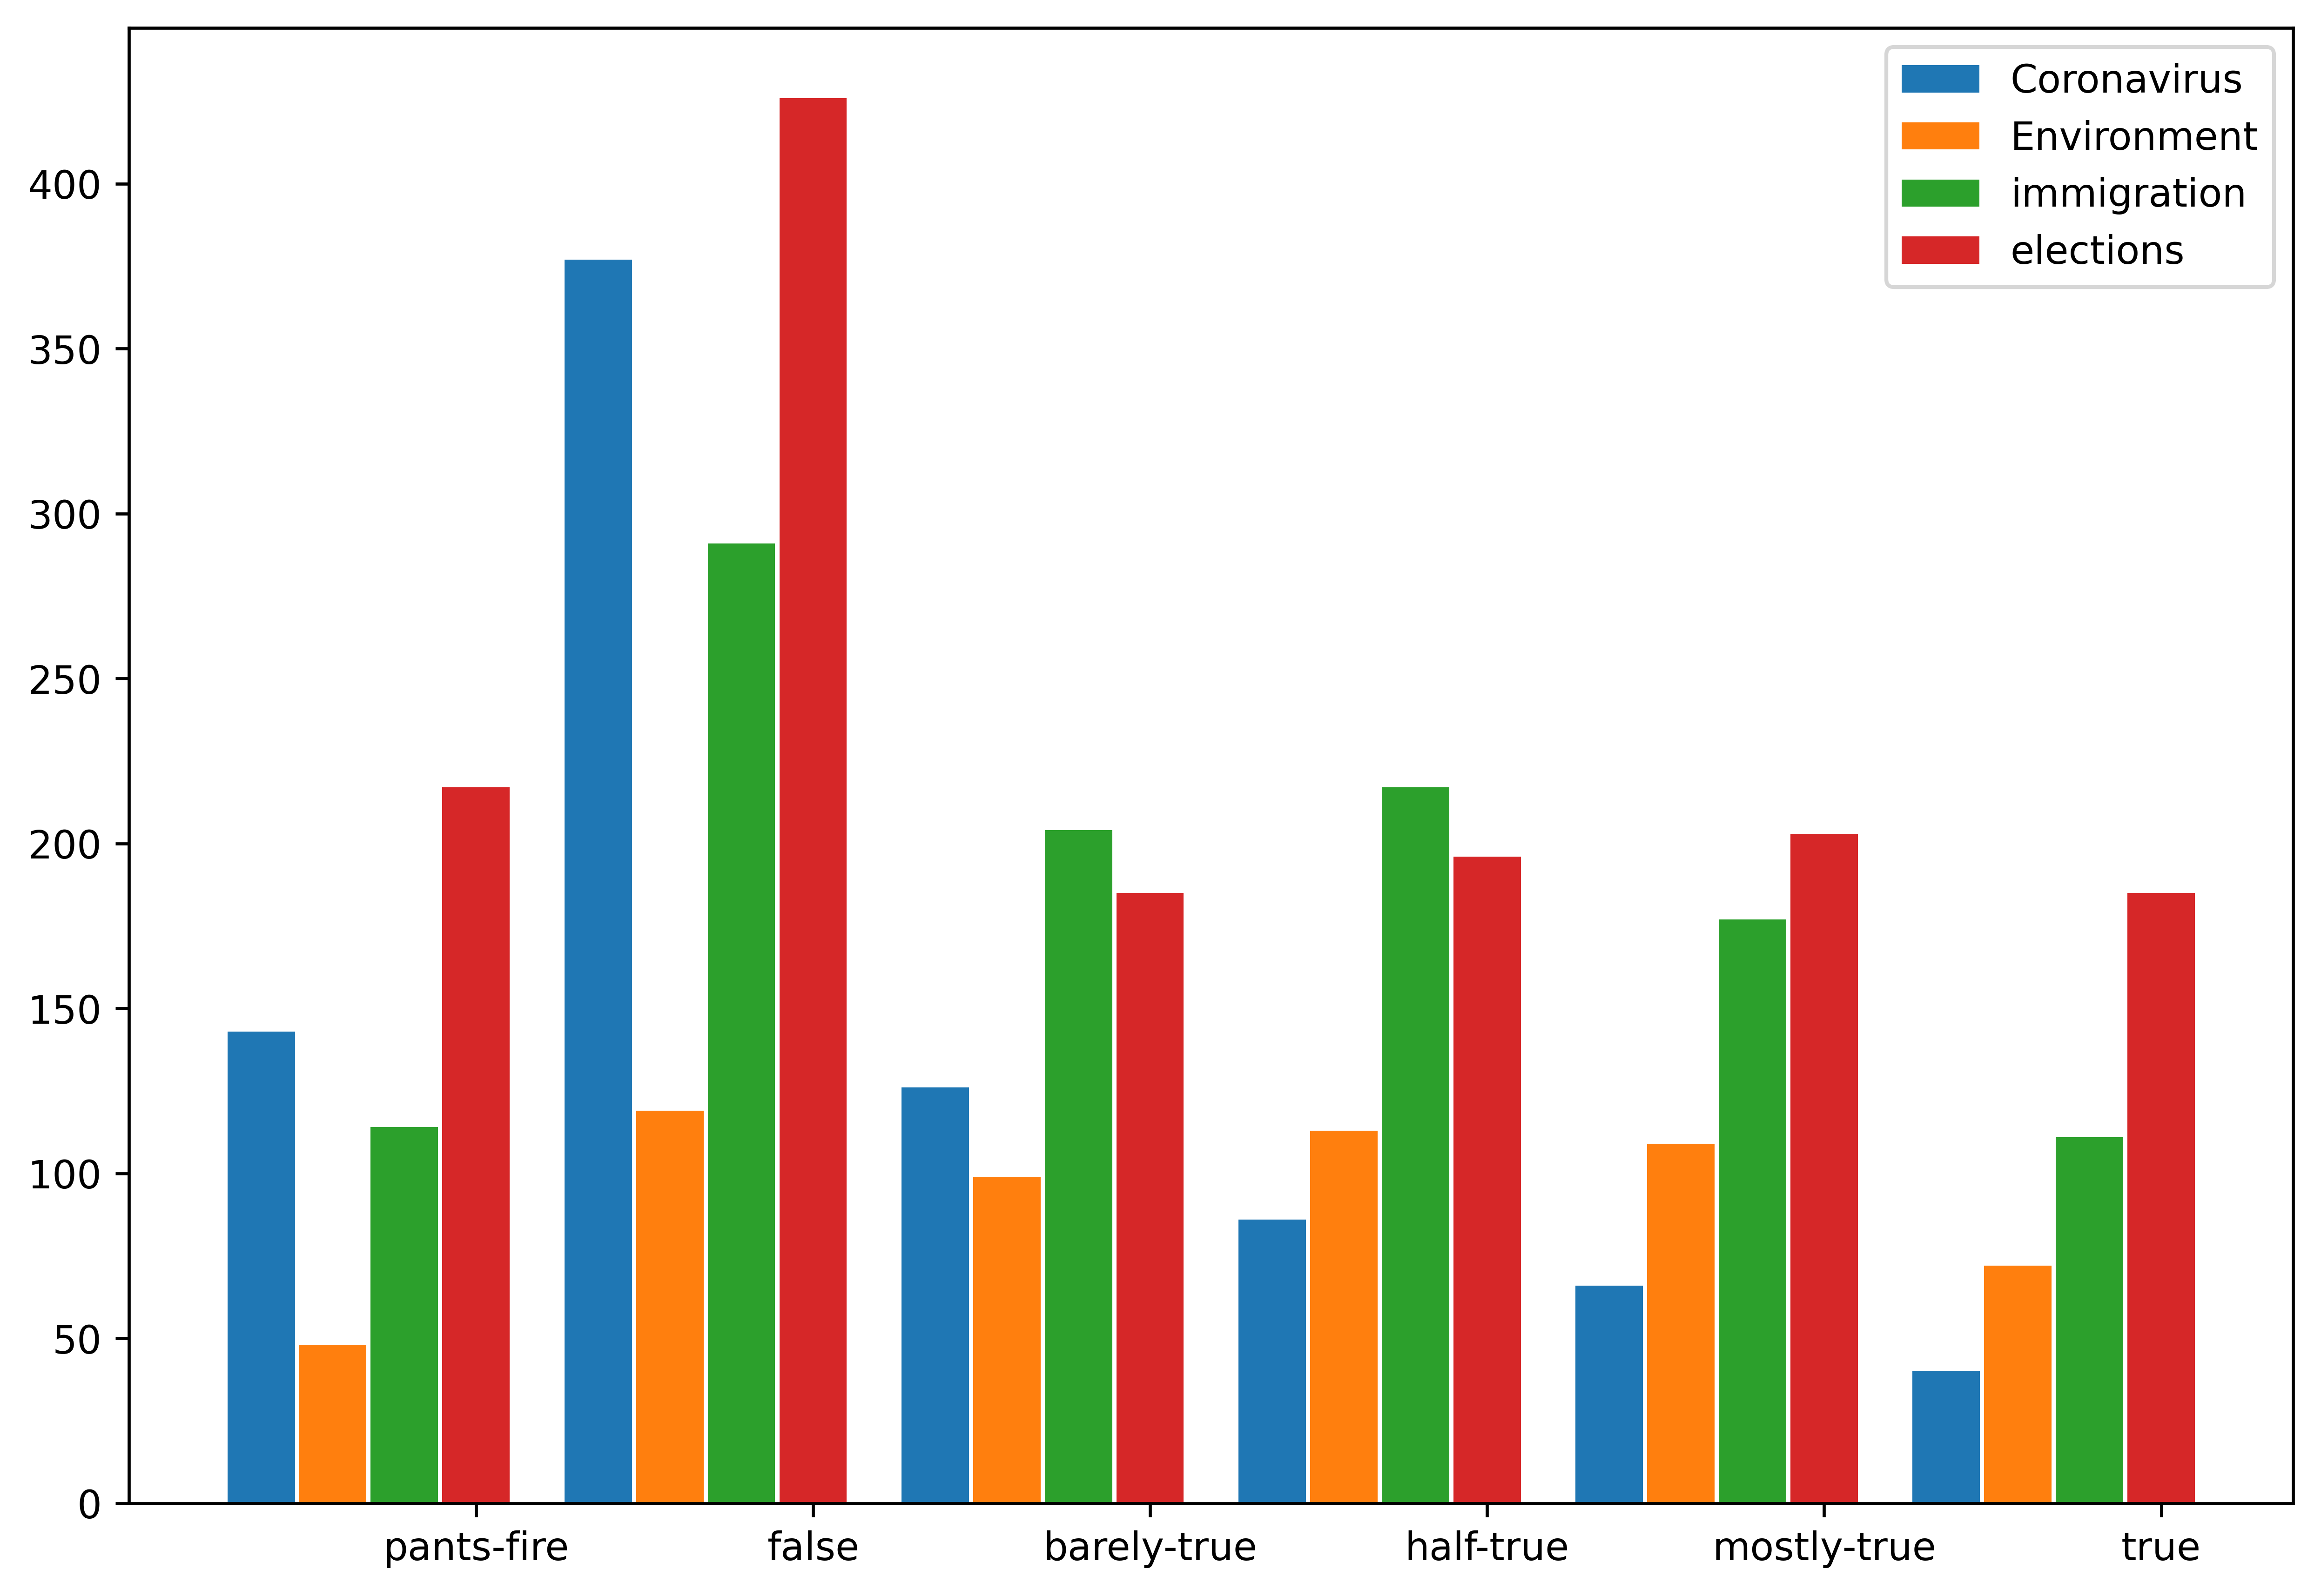

<Figure size 432x288 with 0 Axes>

In [70]:
plt.figure(figsize=(10,7), dpi=600)

t = 4 # number of topics
d = 6 # number of categories 
w = 0.85 # width of each bar

for n in range(t):
    x = [t*element + w*n for element
             in range(d)]
    plt.bar(x, view.iloc[:,n])


plt.xticks(x, view.index)

plt.legend(['Coronavirus', 'Environment', 'immigration', 'elections'])

plt.show()

plt.savefig("topics_distribution.pdf")